##  **Application: Analysis and Visualisation basics**
### 1) Import product_a.csv dataset into python pandas data frame df_product_a. The first column is the index.

In [1]:
import pandas as pd                                             # Required libraries                                                      
import matplotlib.pyplot as plt                         
import seaborn as sns                                   
import plotly.offline as pyo                            
import plotly.graph_objs as go                          
from plotly.offline import iplot, init_notebook_mode    
from plotly import tools                                
pyo.init_notebook_mode(connected=True)
import folium                                                           
from folium import plugins                              
import ipywidgets
import geocoder                                         
import geopy                                             

In [2]:
df_product_a = pd.read_csv("product_a.csv") 
    # Renamed the column to index
df_product_a = df_product_a.rename(columns={df_product_a.columns[0] : "Index"})     
df_product_a.head()                                                                  

Index      date_w  price  total_vol     plu1       plu2    plu3   bags_t  \
0      0  2016-12-24   1.33   64236.62  1036.74   54454.85   48.16  8696.87   
1      1  2016-12-17   1.35   54876.98   674.28   44638.81   58.33  9505.56   
2      2  2016-12-10   0.93  118220.22   794.70  109149.67  130.50  8145.35   
3      3  2016-12-03   1.08   78992.15  1132.00   71976.41   72.58  5811.16   
4      4  2016-11-26   1.28   51039.60   941.48   43838.39   75.78  6183.95   

    bags_s  bags_l  bags_lx type  year location  
0  8603.62   93.25      0.0    A  2015   Albany  
1  9408.07   97.49      0.0    A  2015   Albany  
2  8042.21  103.14      0.0    A  2015   Albany  
3  5677.40  133.76      0.0    A  2015   Albany  
4  5986.26  197.69      0.0    A  2015   Albany

### 2) Convert date_w field to a suitable datetime data type

In [3]:
print(df_product_a.dtypes)                                                                                       
df_product_a['date_w'] = pd.to_datetime(df_product_a['date_w'])         
print(df_product_a.dtypes)                                              

Index          int64
date_w        object
price        float64
total_vol    float64
plu1         float64
plu2         float64
plu3         float64
bags_t       float64
bags_s       float64
bags_l       float64
bags_lx      float64
type          object
year           int64
location      object
dtype: object
Index                 int64
date_w       datetime64[ns]
price               float64
total_vol           float64
plu1                float64
plu2                float64
plu3                float64
bags_t              float64
bags_s              float64
bags_l              float64
bags_lx             float64
type                 object
year                  int64
location             object
dtype: object


### 3) Values of the year column do not match with the values of the date_w column. Correct the values of the       year column.

In [4]:
df_product_a.head()                                             # Year do not match with date_w field

Index     date_w  price  total_vol     plu1       plu2    plu3   bags_t  \
0      0 2016-12-24   1.33   64236.62  1036.74   54454.85   48.16  8696.87   
1      1 2016-12-17   1.35   54876.98   674.28   44638.81   58.33  9505.56   
2      2 2016-12-10   0.93  118220.22   794.70  109149.67  130.50  8145.35   
3      3 2016-12-03   1.08   78992.15  1132.00   71976.41   72.58  5811.16   
4      4 2016-11-26   1.28   51039.60   941.48   43838.39   75.78  6183.95   

    bags_s  bags_l  bags_lx type  year location  
0  8603.62   93.25      0.0    A  2015   Albany  
1  9408.07   97.49      0.0    A  2015   Albany  
2  8042.21  103.14      0.0    A  2015   Albany  
3  5677.40  133.76      0.0    A  2015   Albany  
4  5986.26  197.69      0.0    A  2015   Albany

In [5]:
del df_product_a['year'] 
    # extracted year from datetime column and added it as column for dataframe
df_product_a['year'] = pd.DatetimeIndex(df_product_a['date_w']).year 
df_product_a.head()                                           

Index     date_w  price  total_vol     plu1       plu2    plu3   bags_t  \
0      0 2016-12-24   1.33   64236.62  1036.74   54454.85   48.16  8696.87   
1      1 2016-12-17   1.35   54876.98   674.28   44638.81   58.33  9505.56   
2      2 2016-12-10   0.93  118220.22   794.70  109149.67  130.50  8145.35   
3      3 2016-12-03   1.08   78992.15  1132.00   71976.41   72.58  5811.16   
4      4 2016-11-26   1.28   51039.60   941.48   43838.39   75.78  6183.95   

    bags_s  bags_l  bags_lx type location  year  
0  8603.62   93.25      0.0    A   Albany  2016  
1  9408.07   97.49      0.0    A   Albany  2016  
2  8042.21  103.14      0.0    A   Albany  2016  
3  5677.40  133.76      0.0    A   Albany  2016  
4  5986.26  197.69      0.0    A   Albany  2016

### 4) Create df_stats with the following details from df_product_a
### Columns: filed_name, minimum, maximum, mean, standard deviation, variance, mode, median, 10th, 20th .. 90th percentiles, 1st, 2nd and 3rd quartiles, interquartile distance,skewness and kurtosis.

In [6]:
df_product_b = df_product_a.copy()                            # Deleted all the non-numeric columns 
del df_product_b['Index']                             
del df_product_b['date_w']
del df_product_b['type']
del df_product_b['location']
del df_product_b['year']

In [7]:
minimum = df_product_b.min()  # Calculated the specified statistics except for mode because its producing null values
maximum = df_product_b.max()  
mean = df_product_b.mean()
std_deviation = df_product_b.std()
variance = df_product_b.var()
median = df_product_b.median()
tenth_percentile = df_product_b.quantile(0.1)
twentieth_percentile = df_product_b.quantile(0.2)
thirtieth_percentile = df_product_b.quantile(0.3)
fortieth_percentile = df_product_b.quantile(0.4)
fiftieth_percentile = df_product_b.quantile(0.5)
sixtieth_percentile = df_product_b.quantile(0.6)
seventieth_percentile = df_product_b.quantile(0.7)
eightieth_percentile = df_product_b.quantile(0.8)
nintieth_percentile = df_product_b.quantile(0.9)
first_quartile = df_product_b.quantile(0.25)
second_quartile = df_product_b.quantile(0.5)
third_quartile = df_product_b.quantile(0.75)
inter_quartile_range = third_quartile-first_quartile
skewness = df_product_b.skew()
kurtosis = df_product_b.kurt()

In [8]:
mode_totalvol = df_product_b['total_vol'].mode().iloc[0]          # Mode calculation for total_vol 
   # Mode separately for total_vol and concatenated with the rest
print(mode_totalvol)                                     
del df_product_b['total_vol']                                    
mode_all = df_product_b.mode()                         
mode_all['total_vol'] = [mode_totalvol]                      
mode = mode_all.iloc[0]                                                        
mode      

2038.99


price           1.15
plu1            0.00
plu2            0.00
plu3            0.00
bags_t          0.00
bags_s          0.00
bags_l          0.00
bags_lx         0.00
total_vol    2038.99
Name: 0, dtype: float64

In [9]:
import warnings
     # concatenated the required statistics and renamed as per requirement
concat_statistics = pd.concat([minimum, maximum, mean, std_deviation, variance, mode, median, tenth_percentile, 
                  twentieth_percentile, thirtieth_percentile, fortieth_percentile, fiftieth_percentile, sixtieth_percentile, 
                  seventieth_percentile, eightieth_percentile, nintieth_percentile, first_quartile, second_quartile, 
                  third_quartile, inter_quartile_range, skewness, kurtosis],axis=1)   # Concatenated all stats
df_stats = concat_statistics.rename(columns={concat_statistics.columns[0]:"Minimum", concat_statistics.columns[1]:"Maximum"\
            ,concat_statistics.columns[2]: "Mean", concat_statistics.columns[3]: "Std deviation"\
            ,concat_statistics.columns[4]:"Variance", concat_statistics.columns[5]:"Mode", concat_statistics.columns[6]:\
            "Median", concat_statistics.columns[7]:"10th Perc", concat_statistics.columns[8]:"20th Perc", \
            concat_statistics.columns[9]:"30th Perc", concat_statistics.columns[10]:"40th Perc", \
            concat_statistics.columns[11]:"50th Perc", concat_statistics.columns[12]:"60th Perc", \
            concat_statistics.columns[13]:"70th Perc", concat_statistics.columns[14]:"80th Perc", \
            concat_statistics.columns[15]:"90th Perc", concat_statistics.columns[16]:"Q1", concat_statistics.columns[17]:\
            "Q2", concat_statistics.columns[18]:"Q3", concat_statistics.columns[19]:"IQR", concat_statistics.columns[20]: \
            "Skew", concat_statistics.columns[21]: "Kurtosis"})            
df_stats = df_stats.rename_axis('Field_name')                                  
df_stats.reset_index(inplace=True)                                              
warnings.filterwarnings("ignore")
df_stats.rename(columns={df_stats.columns[1] : "Minimum"})                      

C:\Users\Asha Sanjeev Kurup\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




Field_name  Minimum      Maximum           Mean  Std deviation  \
0     bags_l     0.00   5719096.61   54338.088145   2.439660e+05   
1    bags_lx     0.00    551693.65    3106.426507   1.769289e+04   
2     bags_s     0.00  13384586.80  182194.686696   7.461785e+05   
3     bags_t     0.00  19373134.37  239639.202060   9.862424e+05   
4       plu1     0.00  22743616.17  293008.424531   1.264989e+06   
5       plu2     0.00  20470572.61  295154.568356   1.204120e+06   
6       plu3     0.00   2546439.11   22839.735993   1.074641e+05   
7      price     0.44         3.25       1.405978   4.026766e-01   
8  total_vol    84.56  62505646.52  850644.013009   3.453545e+06   

       Variance  Minimum     Median  10th Perc  20th Perc  ...   60th Perc  \
0  5.951939e+10     0.00    2647.71      0.000     30.918  ...    6087.796   
1  3.130385e+08     0.00       0.00      0.000      0.000  ...       0.000   
2  5.567824e+11     0.00   26362.82    583.110   1686.086  ...   46725.754   
3  9.726741e+11     0.00   39743.83   1299.208   3347.674  ...   62361.468   
4  1.600197e+12     0.00    8645.30     94.276    483.362  ...   31698.078   
5  1.449906e+12     0.00   29061.02    367.484   1918.532  ...   53202.052   
6  1.154853e+10     0.00     184.99      0.000      0.000  ...     768.782   
7  1.621484e-01     1.15       1.37      0.930      1.050  ...       1.480   
8  1.192698e+13  2038.99  107376.76   3896.768   8168.866  ...  192430.124   

    70th Perc   80th Perc    90th Perc        Q1         Q2         Q3  \
0   14392.206   34350.986    94295.338    127.47    2647.71   22029.25   
1      20.252     557.114     3688.912      0.00       0.00     132.50   
2   68884.094  104537.112   354266.852   2849.42   26362.82   83337.67   
3   88901.748  149306.360   442141.928   5088.64   39743.83  110783.37   
4   77991.410  152679.068   538385.184    854.07    8645.30  111020.20   
5   98296.168  222163.620   500784.552   3008.78   29061.02  150206.86   
6    3466.120   10972.600    31492.442      0.00     184.99    6243.42   
7       1.600       1.740        1.930      1.10       1.37       1.66   
8  319613.142  604868.968  1387045.760  10838.58  107376.76  432962.29   

         IQR       Skew    Kurtosis  
0   21901.78   9.796455  117.999481  
1     132.50  13.139751  233.602612  
2   80488.25   9.540660  107.012885  
3  105694.73   9.756072  112.272156  
4  110166.13   8.648220   86.809113  
5  147198.08   8.942466   91.949022  
6    6243.42  10.159396  132.563441  
7       0.56   0.580303    0.325196  
8  422123.71   9.007687   92.104458  

[9 rows x 23 columns]

### 5. Theory: Discuss the relationships between the fields of df_stats. For example, 2nd quartile and the median are the same.

From the above statistics, we can notice some relationships between the fields. Some of them are:
1. *2nd Quartile* is same the *Median* of the dataset
2. *Standard deviation* is the square root of *Variance*
3. *2nd Quartile* is same as *50th percentile*
4. *IQR(Inter-quartile range)* is the difference between *Q3* and *Q1*
5. Difference between *Maximum* and *Minimum* gives the range of distribution 

### 6. Discuss how the columns of df_stats are useful in data analysis.

Some of the columns useful for data analysis are:
1. *Minimum* column can be used to check if there are any negative values for columns. Eg: weight cannot be negative
2. *Mean* column can be used to indicate null values
3. *Standard deviation* can be used to indicate distribution of the data
4. 10th to 90th percentile gives the overall distribution of the data
5. A very high or a very low mean can indicate the presence of outliers because outliers affect mean. This is not a definite
   statement by looking at the statistics.
6. *Mean* greater than *median* or positive *skewed* value indicates positively skewed data
7. *Kurtosis* indicates if the distribution is too sharp or not.


### 7. Analyse data based on your discussion and explain the results. What are the notable features of the dataset?

Notable features of the dataset include:
1. No negative values, found by checking the *Minimum* column
2. No null values, found by checking the *Mean* column
3. *Standard deviation* seems to be high for most of the columns indicating skewed distribution.
4. Skew value greater than 1 indicates positively skewed data.
5. *Kurtosis* very high indicates the distribution curve is sharp

## FEATURE ENGINEERING     
## a)

### 8. Create a Pearson correlation matrix (it is a square matrix) between all the possible fields.What are the  conclusions you make?

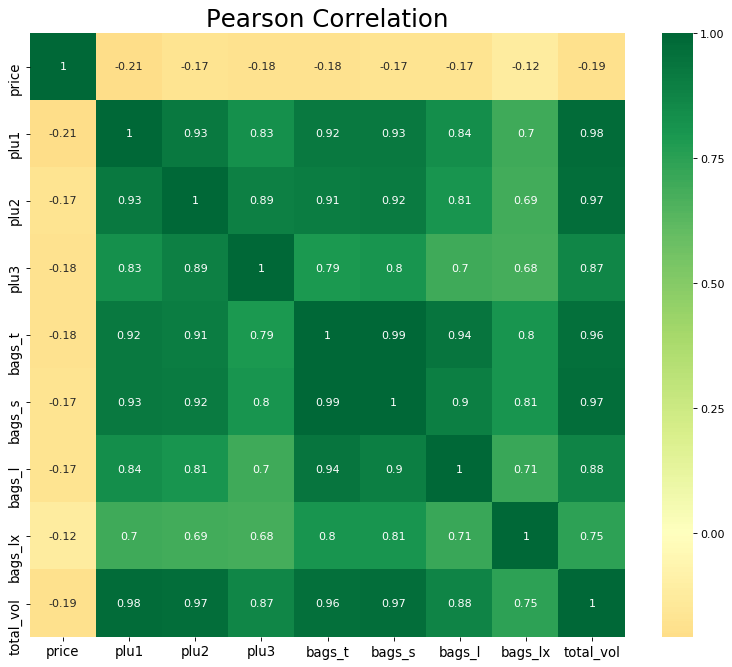

In [10]:
df_product_b['total_vol'] = df_product_a['total_vol']
      # Used heatmap for Pearson correlation matrix
plt.figure(figsize=(12,10), dpi= 80)                                            
sns.heatmap(df_product_b.corr(method='pearson'), xticklabels=df_product_b.corr(method='pearson').columns, 
            yticklabels=df_product_b.corr(method='pearson').columns, cmap='RdYlGn', center=0, annot=True) 
plt.title('Pearson Correlation', fontsize=22)                                   
plt.xticks(fontsize=12)                                                         
plt.yticks(fontsize=12)                                                         
plt.show()

From the above correlation matrix, we get the following information:
1. There is no negative correlation except for the *price* column 
2. *Total_col* column is highly correlated with most of the variables except for *bags_lx*
3. *plu1*, *plu2* and *plu3* are highly correlated with each other.
4. *bags_t* is highly correlated with *bags_s*, *bags_l*, *plu1* and *plu2* variables.
5. *bags_lx* is moderately correlated with other variables.

Correlation is a very good for feature engineering.

## b)
### 9. Create a Spearman correlation matrix (it is a square matrix) between all the possible fields.What are the conclusions you make?

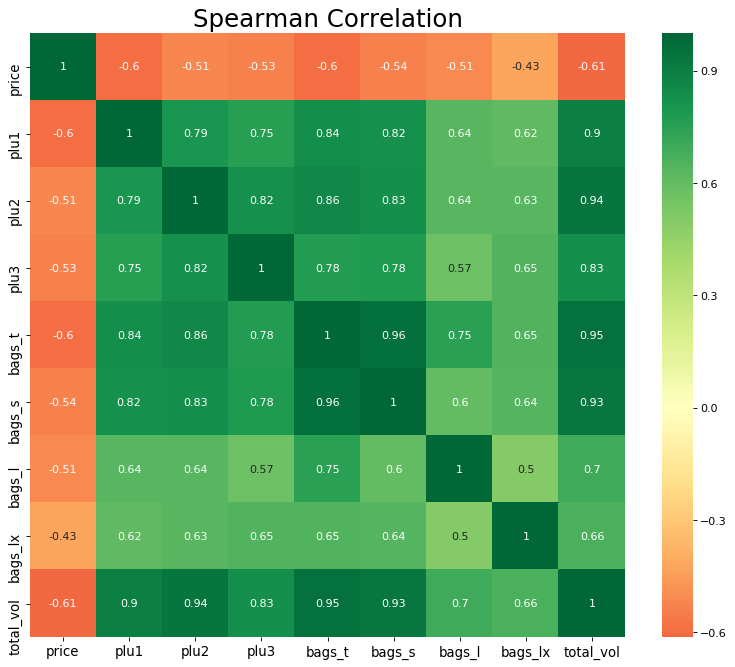

In [11]:
plt.figure(figsize=(12,10), dpi=80) 
     # Used heatmap for Spearman correlation matrix
sns.heatmap(df_product_b.corr(method='spearman'), xticklabels=df_product_b.corr(method='spearman').columns, 
            yticklabels=df_product_b.corr(method='spearman').columns, cmap='RdYlGn', center=0, annot=True)  
plt.title('Spearman Correlation', fontsize=22)                           
plt.xticks(fontsize=12)                                                  
plt.yticks(fontsize=12)                                                      
plt.show()

From the above correlation matrix, we get the following information:
1. The above matrix does not show as high positive correlation values as the Pearson matrix.
2. The *total_vol* column shows high correlation with *plu2*, *bags_t* and *bags_s*.
3. *bags_s* and *bags_t* are highly correlated to each other.
4. All the other variables are less than 90% correlated to each other

### 10. Create a seaborne pairplot for df_product_a. What are the conclusions you can make using the analysis so far

<Figure size 800x640 with 0 Axes>

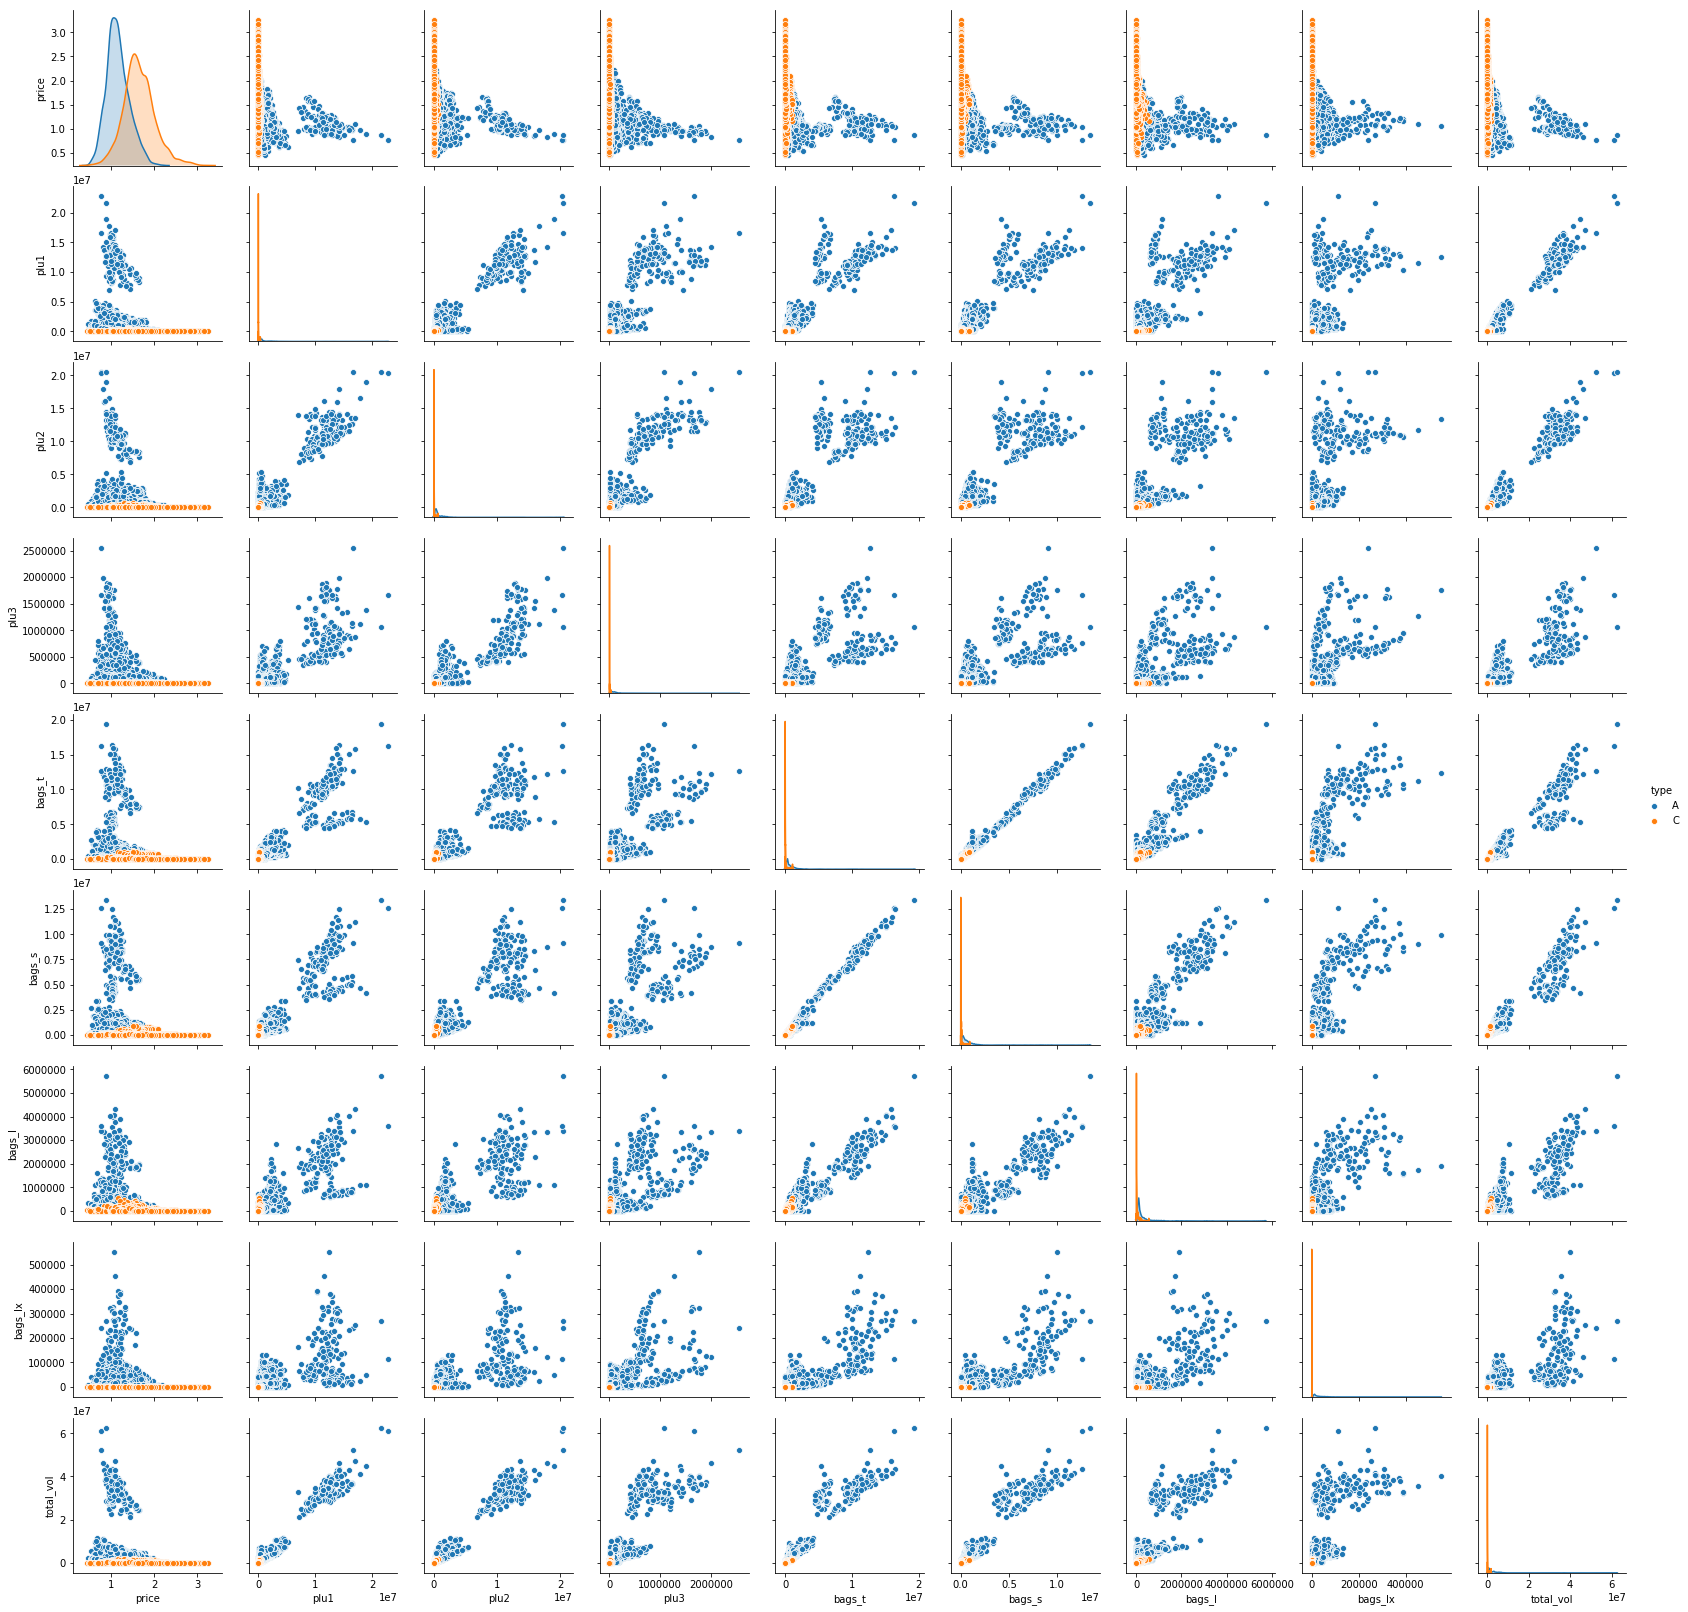

In [12]:
df_product_c = df_product_b.copy()
      #Pairplot made with scatter
df_product_c['type'] = df_product_a['type']
plt.figure(figsize=(10,8), dpi=80)
sns.pairplot(df_product_c, kind="scatter", hue="type")
plt.show()

The above pairplot is very similar to the correlation matrix. The only additional parameter is the categorical variable 
*type*. Some of the notable results include:
1. Highest linear positive correlation is between *bags_t* and *bags_s*. We can also notice that *type C* values are very
   less and are very close to 0.
2. *Price* doesnt show a high correlation with other variables
3. *total_vol*, *plu1* and *plu2* shows significant correlation with other variables except the *price*
4. *bags_lx* shows a moderate correlation when compared to other variables.

### 11. Draw year based location and type bar charts using Plotly. Discuss your results.

#### a. Year based location chart 

In [13]:
crosstab = pd.crosstab(index=df_product_a["location"],                 
                           columns=df_product_a["year"])
       # cross tabulation for year and location variables
crosstab.reset_index(inplace=True)
crosstab = crosstab.rename(columns={crosstab.columns[1]:"year_2015", crosstab.columns[2]:"year_2016", 
                              crosstab.columns[3]:"year_2017", crosstab.columns[4]:"year_2018"} )
crosstab = crosstab.rename_axis('Index')
crosstab.reset_index(inplace=True)
crosstab.head()

year  Index             location  year_2015  year_2016  year_2017  year_2018
0         0               Albany        106        104        104         24
1         1              Atlanta        106        104        104         24
2         2  BaltimoreWashington        106        104        104         24
3         3                Boise        106        104        104         24
4         4               Boston        106        104        104         24

In [14]:
trace0 = go.Bar(                                      # Grouped bar charts for 4 years and appropriate legend
         x = crosstab['location'],                    # name for each.
         y = crosstab['year_2015'],
         name = '2015'
)
trace1 = go.Bar(
         x = crosstab['location'],
         y = crosstab['year_2016'],
         name = '2016'
)
trace2 = go.Bar(
         x = crosstab['location'],
         y = crosstab['year_2017'],
         name = '2017'
)
trace3 = go.Bar(
         x = crosstab['location'],
         y = crosstab['year_2018'],
         name = '2018'
)


In [15]:
data = [trace0, trace1, trace2, trace3]                           
layout = go.Layout(title = "Year V/S location",                     
                  xaxis = dict(title='Location'),               
                  yaxis = dict(title='Year'),                   
                  hovermode = 'closest')                      

In [16]:
figure = go.Figure(data=data, layout=layout)                      
pyo.iplot(figure)

From the above chart we can say the following:
1. *Location* does not have much affect yearly. Every location has the same count yearly
2. *Year 2018* has the least and *Year 2017* has the highest count.
3. A small change can be observed in *location West* in the *year 2017*. The count is less when compared to the rest. 

#### b. Year based type chart

In [17]:
crosstab = pd.crosstab(index=df_product_a["year"],              # cross tabulation for year and type
                           columns=df_product_a["type"])
crosstab

type     A     C
year            
2016  2862  2861
2017  2808  2808
2018  2808  2806
2019   648   648

In [18]:
trace0 = go.Bar(
         x = crosstab.index,
         y = crosstab.A,
         name = 'A'
)

trace1 = go.Bar(
         x = crosstab.index,
         y = crosstab.C,
         name = 'C'
)

In [19]:
data = [trace0,trace1]
layout = go.Layout(title="Year V/S type")

In [20]:
figure = go.Figure(data=data, layout=layout)
pyo.iplot(figure)

From the above chart we can say the following:
1. *Type* does not have much affect yearly. Every *type* has the same count yearly
2. *Year 2019* has the least and *Year 2016* has the highest count.

### 12. Compare and contrast the prices of each type, each location and {location and type} combination. Visualise the results using suitable plots.

### a. Price V/S Type

In [21]:
pivot_type = pd.pivot_table(data=df_product_a, index='type', values='price', aggfunc='mean').reset_index().rename(columns=
                                                {'price':'price'})            # pivot to get mean price for each type
pivot_type


type     price
0    A  1.158040
1    C  1.653999

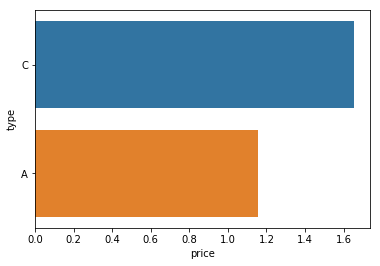

In [22]:
sns.barplot(x="price", y="type", data=pivot_type, order=['C','A'])          

From the above plot, it is evident that *Type C* has high price when compared to *Type A*. The same can be found from the 
table.

### b. Price V/S Location

In [23]:
pivot_location = pd.pivot_table(data=df_product_a, index='location', values='price', aggfunc='mean').reset_index().rename\
(columns={'location':'location'})                    
pivot_location = pivot_location.sort_values('price',ascending=False)
pivot_location.shape

(54, 2)

In [24]:
data = [go.Scatter(                                        
    x=pivot_location.location,                              
    y=pivot_location.price,                                
    mode='markers'                                                
    )]
layout = go.Layout(
title = 'Location V/S Price',                             
xaxis = dict(title='Location'),                          
yaxis = dict(title='Price'),                            
hovermode = 'closest'
)

In [25]:
figure = go.Figure(data=data, layout=layout)               
pyo.iplot(figure)                                                                                
#pyo.plot(figure)

From the above figure, we can say that *HartfordSpringfield* location has the highest price and *DallasFtWorth* location
has the lowest price
* Note: To get the plot for all 54 locations, use the commented command instead.

### c. Price V/S (Location & type)

In [26]:
pivot_both = pd.pivot_table(data=df_product_a, index=['type','location'], values='price', aggfunc='mean').reset_index()\
.rename(columns={'location':'location'})
pivot_both.head()

type             location     price
0    A               Albany  1.348757
1    A              Atlanta  1.068817
2    A  BaltimoreWashington  1.344201
3    A                Boise  1.076036
4    A               Boston  1.304379

In [27]:
pivot_typea = pivot_both[pivot_both['type'] == 'A']
pivot_typec = pivot_both[pivot_both['type'] == 'C']

In [28]:
trace0 = go.Scatter(                                        
    x = pivot_typea.location,                                 
    y = pivot_typea.price,
    mode = 'markers+lines',
    name = 'Type A'
    )
trace1 = go.Scatter(                                        
    x = pivot_typec.location,                                 
    y = pivot_typec.price,
    mode = 'markers+lines',
    name = 'Type C'
    )
layout = go.Layout(                                         
title = 'Location V/S Price',
xaxis = dict(title='Location'),
yaxis = dict(title='Price'),
hovermode = 'closest'
)

In [29]:
data = [trace0,trace1]                                      

In [30]:
figure = go.Figure(data=data, layout=layout)                
pyo.iplot(figure)
#pyo.plot(figure)

From the above plot we can say the following:
1. Prices for *TypeA* is less when compared to *TypeC*
2. The price in *HarrisburgScranton* is highest for both types
3. The least price for *TypeC* is for *Houston* and for *TypeA* is for *PhoenixTucson*
4. However, the graph follows a similar trend for both types.

*Note: To get the plot for all 54 locations, use the commented command instead.

### d. Price V/S Bags

In [31]:
Bags_s = go.Scatter(                                   
    x=df_product_a.bags_s,
    y=df_product_a.price,
    mode='markers',    
    )

Bags_t = go.Scatter(                                   
    x=df_product_a.bags_t,
    y=df_product_a.price,
    mode='markers'
    )

Bags_l = go.Scatter(                                   
    x=df_product_a.bags_l,
    y=df_product_a.price,
    mode='markers',    
    )

Bags_lx = go.Scatter(                            
    x=df_product_a.bags_lx,
    y=df_product_a.price,
    mode='markers'
    )

fig=tools.make_subplots(rows=2,
                       cols=2,
                       subplot_titles = ('Price V/S Bags_s','Price V/S Bags_t','Price V/S Bags_l', 'Price V/S Bags_lx'))

fig.update_xaxes(title_text="Bags_s", row=1, col=1)
fig.update_xaxes(title_text="Bags_t", row=1, col=2)
fig.update_xaxes(title_text="Bags_l", row=2, col=1)
fig.update_xaxes(title_text="Bags_lx", row=2, col=2)


fig.update_yaxes(title_text="Price", row=1, col=1)
fig.update_yaxes(title_text="Price", row=1, col=2)
fig.update_yaxes(title_text="Price", row=2, col=1)
fig.update_yaxes(title_text="Price", row=2, col=2)

fig.append_trace(Bags_s,1,1)
fig.append_trace(Bags_t,1,2)
fig.append_trace(Bags_l,2,1)
fig.append_trace(Bags_lx,2,2)
 
fig.layout.update(title="Price V/S Bags")

iplot(fig)

From the above plot, we can say that
1. The trend remains the same irrespective of the *Bags*
2. *Price* goes high only when the values of *Bags* reduce

### e. Price V/S (All columns)

In [32]:
import plotly.express as px
px.scatter(df_product_a, x="total_vol", y="price", animation_frame="year", animation_group="location",
           size="bags_t", color="type", hover_name="location", log_x=True, size_max=80, range_x=[80,1000000000], 
           range_y=[0,5], labels = dict(type='Type', year='Year',total_vol='Total volume', price='Price', bags_t='Bags_t'))

From the above plot, we can say the following:
1. *Total volume* has an inverse trend with *price*
2. The volume of *Type A* products is high when compared to *Type C*
3. *Total US* has the highest volume both for *Type A* and *Type C* when compared to other locations
4. *Total volume* increases with *year*
5. *Total US* has the highest *Bags_t* and is increasing with *year*


### 13. Visualise data on a folium map. The locations should have markers with a colour range based on the mean values of bags_t. Tooltips should show the total values of bags_t and total values of bag_t for each type. When markers are clicked, the average values of all numeric fields should be shown.

In [33]:
location_list = ['Albany', 'Atlanta', 'Baltimore Wasington', 'Boise', 'Boston', 'Buffalo Rochester', 'California', 
'Charlotte', 'Chicago','Cincinnati Dayton', 'Columbus', 'Dallas Ft Worth', 'Denver', 'Detroit', 'Grand Rapids','Great Lakes'
,'Harrisburg Scranton', 'Hartford Springfield', 'Houston', 'Indianapolis', 'Jacksonville','Las Vegas', 'Los Angeles', 
'Louisville', 'Miami Ft Lauderdale', 'Midsouth', 'Nashville', 'New Orleans Mobile','New York', 'Northeast', 
'Northern New England', 'Orlando', 'Philadelphia', 'Phoenix Tucson', 'Pittsburgh','Plains', 'Portland', 
'Raleigh Greensboro', 'Richmond Norfolk', 'Roanoke', 'Sacramento', 'San Diego','San Francisco', 'Seattle', 'South Carolina', 'South Central', 'Southeast', 'Spokane', 'St Louis', 'Syracuse',
'Tampa', 'Total US', 'West', 'West Tex New Mexico']   # List of location with spacing created

In [34]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='myapplication')
latitude = []                                        
for item in location_list:
    # Loop over all the locations and generate latitude and finally to the latitude list
    location_final = geolocator.geocode(item)
    location_lat = location_final.latitude
    latitude.append(location_lat)
longitude = []
for item in location_list:
    # Loop over all the locations and generate longitude and finally to the longitude list
    location_final = geolocator.geocode(item)
    location_long = location_final.longitude
    longitude.append(location_long)

In [35]:
df_product_a_mean = pd.pivot_table(data=df_product_a, index=['location'], values=['bags_t','price','total_vol','plu1',\
                   'plu2','plu3','bags_s','bags_lx'], aggfunc='mean').reset_index().rename(columns={'value':'bags_t'})    
df_product_a_mean['Latitude'] = latitude            
df_product_a_mean['Longitude'] = longitude          

In [36]:
df_product_a_sum = pd.pivot_table(data=df_product_a, index=['location'], values=['bags_t','bags_s'], aggfunc='sum')\
                   .reset_index().rename(columns={'value':'bags_t'})   
df_product_a_mean['bags_s_sum'] = df_product_a_sum['bags_s']  
df_product_a_mean['bags_t_sum'] = df_product_a_sum['bags_t']  

In [37]:
df_product_a_mean = df_product_a_mean.round(3) 
df_product_a_mean.head()                       

location  bags_lx      bags_s      bags_t        plu1  \
0               Albany  128.489    6647.765    7929.747    1824.082   
1              Atlanta  822.786   51605.727   84498.561  146116.868   
2  BaltimoreWashington  612.383  100939.683  104456.053   35656.218   
3                Boise   30.915   13840.037   15974.592   20019.508   
4               Boston  251.124   58906.590   63596.085    4994.610   

         plu2       plu3  price   total_vol  Latitude  Longitude   bags_s_sum  \
0   37621.208    162.832  1.561   47537.870    42.651    -73.755   2246944.73   
1   31218.510    311.386  1.338  262145.322    33.749    -84.390  17442735.84   
2  245982.889  12466.731  1.534  398561.891    39.291    -76.611  34117612.92   
3    3461.682   3186.788  1.348   42642.567    43.617   -116.201   4677932.59   
4  214219.864   4982.295  1.531  287792.855    42.360    -71.058  19910427.54   

    bags_t_sum  
0   2680254.61  
1  28560513.58  
2  35306146.07  
3   5399412.25  
4  21495476.80

In [38]:
import warnings
     # Map to specify location and marker color based on mean of bags_t column
maps = folium.Map(location = [38,-98], zoom_start=2)    
df_product_a_mean['marker_color'] = pd.cut(df_product_a_mean['bags_t'], bins=10,
                                  labels=['yellow', 'blue', 'red', 'pink' 'orange', 'maroon', 'green', 'white',
                                  'purple','brown','black'])   # marker colors based on avg bags_t

for index, row in df_product_a_mean.iterrows():
    # loop over all the rows in the dataframe and generate markers with tooltip and popup
    folium.Marker([row['Latitude'], row['Longitude']],             
                    radius=15, icon=folium.Icon(color=row['marker_color']), tooltip = ['bags_s:'+str(row['bags_s_sum'])+
                                                                                       ', bags_t:'+str(row['bags_t_sum'])],
                  popup = [row['bags_t'],row['bags_s'],row['bags_lx'], row['plu1'], row['plu2'], row['plu3'],
                           row['price'],row['total_vol']]).add_to(maps)
warnings.filterwarnings("ignore")                       # warnings supressed

In [39]:
maps                                                    